# Shrodinger Equation

## 1-d Shrodinger Equation
$$
\begin{equation}
-\frac{\hbar^2}{2\mu}\frac{\partial^2{\Psi(x, t)}}{\partial x^2} + U(x, t)\Psi(x, t)=i\hbar\frac{\partial\Psi(x, t)}{\partial t}
\end{equation}
$$

## 2-d Shrodinger Equation
$$
\begin{equation}
-\frac{\hbar^2}{2\mu}(\frac{\partial^2{\Psi(x, y, t)}}{\partial x^2}+\frac{\partial^2{\Psi(x, y, t)}}{\partial y^2}) + U(x, y, t)\Psi(x, y, t)=i\hbar\frac{\partial\Psi(x, y, t)}{\partial t}
\end{equation}
$$

## 3-d Shrodinger Equation
$$
\begin{equation}
-\frac{\hbar^2}{2\mu}(\frac{\partial^2{\Psi}}{\partial x^2}+\frac{\partial^2{\Psi}}{\partial y^2}+\frac{\partial^2{\Psi}}{\partial z^2}) + U(x, y, z, t)\Psi=i\hbar\frac{\partial\Psi}{\partial t}
\end{equation}
$$

## Infinite Potential Well(1d)

### potential energy
$$
\begin{equation}
    V(x) = 
    \left\{
        \begin{array}{cc}
            0, & -\frac{L}{2} < x < \frac{L}{2}, \\ 
            \infin, & otherwise,
        \end{array}
    \right.
\end{equation}
$$
where $L$ is the length of the box, the location of the center of the box is 0 and $x$ is the position of the particle.

### Def PDE of Shrodinger Equation in a infinite potential well

$$
\begin{equation}
    \left\{
        \begin{array}{cc}
        i\hbar\frac{\partial\Psi(x, t)}{\partial t}+\frac{\hbar^2}{2m}\frac{\partial\Psi(x, t)}{\partial x^2}=0 \\ \\
        \Psi(x, 0) = Asin(k_n(x+\frac{L}{2})) \\ \\
        \Psi(-\frac{L}{2}, t)=0 \\ \\
        \Psi(\frac{L}{2}, t)=0 \\ \\
        \end{array}
    \right.
    , -\frac{L}{2} < x < \frac{L}{2}
\end{equation}
$$
where $k_n=\frac{n\pi}{L}$, $n$ is a positive integer, and $|A|=\sqrt{\frac{2}{L}}$

### Finite Difference

$$
\begin{equation}
    \begin{array}{cc}
        \begin{split}
            \frac{\partial\Psi}{\partial t} 
            &= \frac{i}{2}\frac{\partial^2\Psi}{\partial x^2} \\
            &= \frac{i}{2}\frac{\Psi_{j+1}^n-2\Psi_j^n+\Psi_{j-1}^n}{\Delta x^2}
        \end{split}
    \end{array}
\end{equation}
$$

obtain,
$$
\begin{equation}
    \frac{\Psi_j^{n+1}-\Psi_j^n}{\Delta t} = \frac{i}{2}\frac{\Psi_{j+1}^n-2\Psi_j^n+\Psi_{j-1}^n}{\Delta x^2}
\end{equation}
$$
where $\Psi_j^{n}$ is the wave function value at j-th point when time equal to $n\Delta t$

then,
$$
\begin{equation}
    \Psi_j^{n+1} 
    = \Psi_j^n+\frac{i\Delta t}{2} \frac{\Psi_{j+1}^n-2\Psi_j^n+\Psi_{j-1}^n}{\Delta x^2}
\end{equation}
$$

matrix

$$
\begin{equation}
    \bm{\Psi^{n+1}} = \bm{\Psi^n} + \frac{i\Delta t}{2\Delta x^2} 
    \left[
        \begin{array}{cc}
        -2&1&0&0&\cdots&0&0&0 \\
        1&-2&1&0&\cdots&0&0&0 \\
        0&1&-2&1&\cdots&0&0&0 \\
        \vdots&\ddots&\ddots&\ddots&\ddots&\ddots&\ddots&\vdots \\
        \vdots&\ddots&\ddots&\ddots&\ddots&\ddots&\ddots&\vdots \\
        0&0&0&0&\cdots&1&-2&1 \\
        0&0&0&0&\cdots&0&1&-2 \\
        \end{array}
    \right]
    \left[
        \begin{array}{cc}
        \Psi^n_1 \\
        \Psi^n_2 \\
        \Psi^n_3 \\
        \vdots \\
        \vdots \\
        \Psi^n_{J-1} \\
        \Psi^n_J \\
        \end{array}
    \right]
\end{equation}
$$

because $\Psi(-\frac{L}{2}, t)=0$ and $\Psi(\frac{L}{2}, t)=0$

obtain
$$
\begin{equation}
    \bm{\Psi^{n+1}} = \bm{\Psi^n} + \frac{i\Delta t}{2\Delta x^2} 
    \left[
        \begin{array}{cc}
        0&0&0&0&\cdots&0&0&0 \\
        1&-2&1&0&\cdots&0&0&0 \\
        0&1&-2&1&\cdots&0&0&0 \\
        \vdots&\ddots&\ddots&\ddots&\ddots&\ddots&\ddots&\vdots \\
        \vdots&\ddots&\ddots&\ddots&\ddots&\ddots&\ddots&\vdots \\
        0&0&0&0&\cdots&1&-2&1 \\
        0&0&0&0&\cdots&0&0&0 \\
        \end{array}
    \right]
    \left[
        \begin{array}{cc}
        \Psi^n_1 \\
        \Psi^n_2 \\
        \Psi^n_3 \\
        \vdots \\
        \vdots \\
        \Psi^n_{J-1} \\
        \Psi^n_J \\
        \end{array}
    \right]
\end{equation}
$$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
# Finite Difference

# state num
state_num = 1
# box length
box_l = 2
# cal time
time_total = 2
# time step
delta_time = 0.00001
# space step
delta_x = 0.1
# time discrete num
time_n = int(time_total/delta_time)
# space discrete num
space_n = int(box_l/delta_x)

# result matrix space_point * time_point
phi_matrix = np.zeros((int(space_n), int(time_n))).astype(np.complex64)
# def A matrix
parm_matrix = -2*np.eye(int(space_n)) + np.eye(int(space_n), k=1) + np.eye(int(space_n), k=-1) + 0.j
parm_matrix[0, :] = 0
parm_matrix[-1, :] = 0

# init wave
phi_matrix[:, 0] = np.sin((state_num*np.pi/box_l)*(np.linspace(-box_l/2, box_l/2, space_n)+box_l/2))

In [81]:
# iter
constant_ = 1.j*delta_time/(2*np.power(delta_x, 2))
for i in range(time_n-1):
    temp_value = phi_matrix[:, i] + constant_ * np.matmul(parm_matrix, phi_matrix[:, i])
    phi_matrix[:, i+1] = temp_value
print("done...")

done...


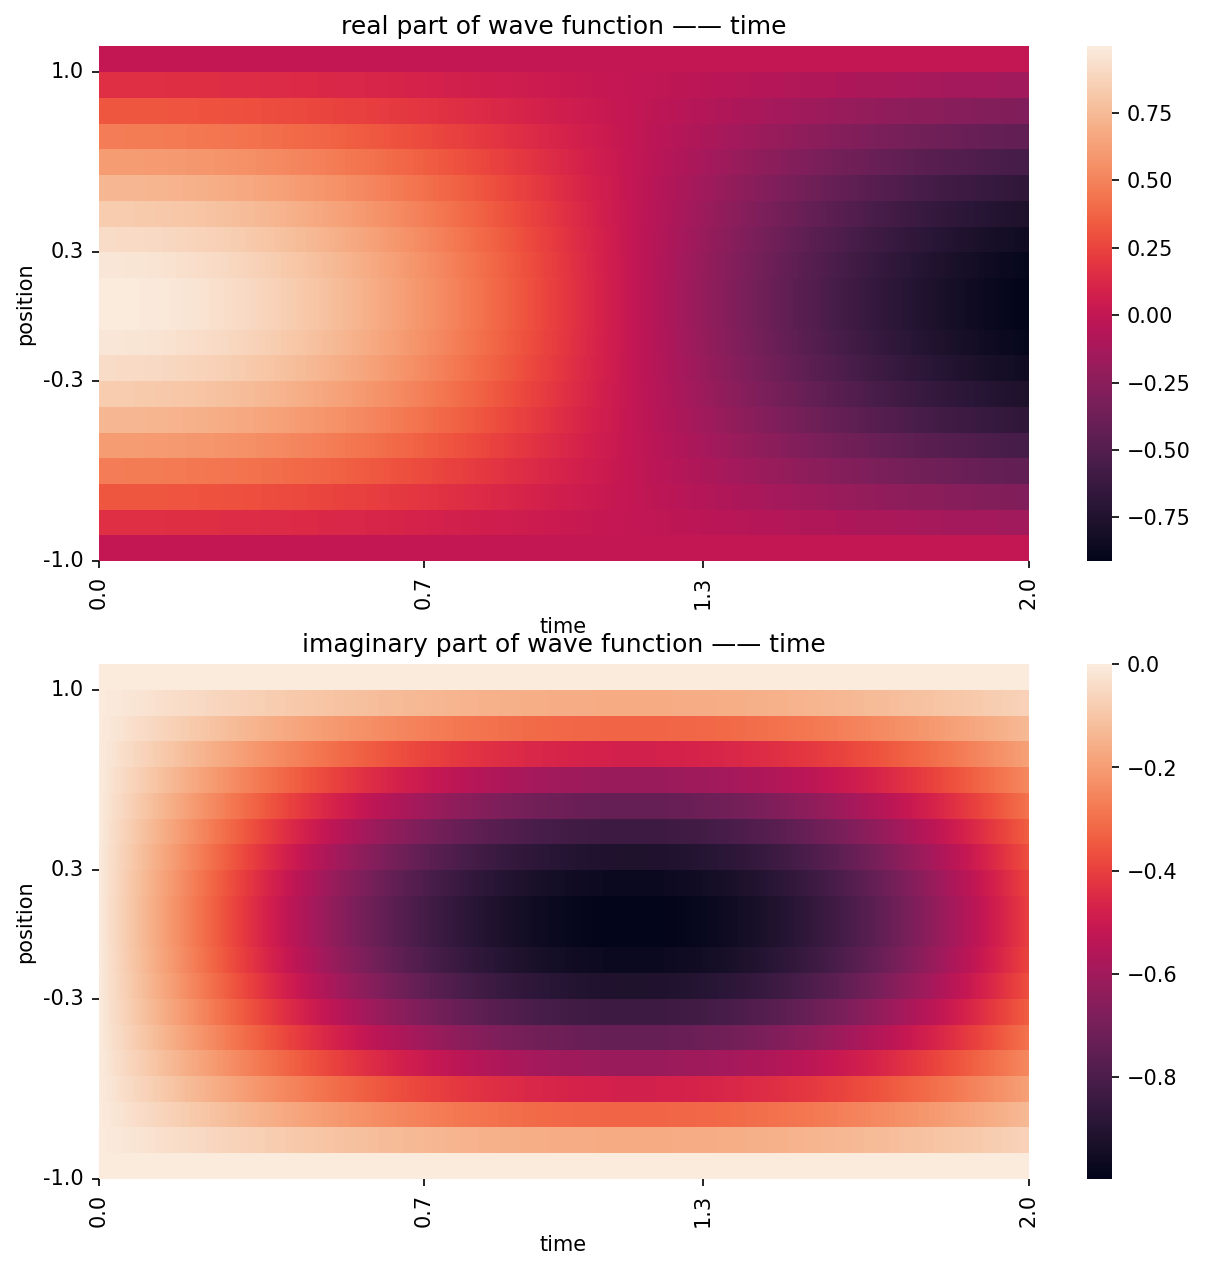

In [82]:
# plot
plt.figure(figsize=(10, 10), dpi=150)
time_list = np.linspace(0, time_total, time_n)
position_list = np.linspace(-box_l/2, box_l/2, space_n)

position_labels = np.around(np.linspace(-box_l/2, box_l/2, 4), 1)
# the index position of the tick labels
position_ticks = list()
for label in position_labels:
    idx_pos = len(position_list) - np.argmin(np.abs(label-position_list))
    position_ticks.append(idx_pos)

time_labels = np.around(np.linspace(0, time_total, 4), 1)
time_ticks = list()
for label in time_labels:
    idx_pos = np.argmin(np.abs(label-time_list))
    time_ticks.append(idx_pos)

# real
plt.subplot(2, 1, 1)
ax = sns.heatmap(np.real(phi_matrix), annot=False)
ax.set_xlabel("time")
ax.set_ylabel("position")
ax.set_yticks(position_ticks)
ax.set_xticks(time_ticks)
ax.set_title("real part of wave function —— time")
ax.set_xticklabels(time_labels)
ax.set_yticklabels(position_labels)

# imag
plt.subplot(2, 1, 2)
ax_imag = sns.heatmap(np.imag(phi_matrix), annot=False)
ax_imag.set_xlabel("time")
ax_imag.set_ylabel("position")
ax_imag.set_yticks(position_ticks)
ax_imag.set_xticks(time_ticks)
ax_imag.set_title("imaginary part of wave function —— time")
ax_imag.set_xticklabels(time_labels)
ax_imag.set_yticklabels(position_labels)

plt.show()

## Finite Difference Runge-Kutta Method

Obviously, the accuracy of finite difference is not enough, and consider to use Runge-Kutta method

### Fourth Runge-Kutta Method

$$
\begin{equation}
    \left\{
        \begin{array}{cc}
            y^{n+1} = y^n + \frac{h}{6}(k_1+2k_2+2k_3+k_4) \\ \\ 
            k_1 = f(y^n, t^n) \\ \\
            k_2 = f(y^n+k_1\frac{h}{2}, t^n+\frac{h}{2}) \\ \\
            k_3 = f(y^n+k_2\frac{h}{2}, t^n+\frac{h}{2}) \\ \\
            k_4 = f(y^n+hk_3, t^n+h)
        \end{array}
    \right.
\end{equation}
$$

### Finite difference with Fourth Runge-Kutta Method

$$
\begin{equation}
    \begin{split}
        \frac{\partial\Psi}{\partial t} 
        &= \frac{i}{2}\frac{\Psi_{j+1}^n-2\Psi_j^n+\Psi_{j-1}^n}{\Delta x^2} \\
        &= f(\Psi, t)
    \end{split}
\end{equation}
$$

obtain
$$
\begin{equation}
    \left\{
        \begin{array}{cc}
            \begin{split}
            \Psi^{n+1}_j &= \Psi^n_j + \Delta t k \\ &= \Psi^n_j + \frac{h}{6}(k_1+2k_2+2k_3+k_4) 
            \end{split}
            \\ \\
            h = \Delta t 
            \\ \\
            \begin{split}
            k_{1j} &= f(\Psi^n_j, t^n)\\ &= \frac{i}{2}\frac{\Psi_{j+1}^n-2\Psi_j^n+\Psi_{j-1}^n}{\Delta x^2} 
            \end{split}
            \\ \\
            \begin{split}
            k_{2j} &= f(\Psi^n_j+k_{1j}\frac{h}{2}, t^n+\frac{h}{2})\\ &= \frac{i}{2}\frac{\Psi_{j+1+k_1\frac{h}{2}}^{n+\frac{h}{2}}-2\Psi_{j+k_1\frac{h}{2}}^{n+\frac{h}{2}}+\Psi_{j-1+k_1\frac{h}{2}}^{n+\frac{h}{2}}}{\Delta x^2}\\ &= \frac{i}{2}\frac{\Psi_{j+1}^{n}+\frac{h}{2}k_{1(j+1)}-2\Psi_{j}^{n}-hk_{1j}+\Psi_{j-1}^{n}+\frac{h}{2}k_{1(j-1)}}{\Delta x^2}
            \end{split} 
            \\ \\
            \begin{split}
            k_{3j} &= f(\Psi^n_j+k_{2j}\frac{h}{2}, t^n+\frac{h}{2})\\ &= \frac{i}{2}\frac{\Psi_{j+1+k_2\frac{h}{2}}^{n+\frac{h}{2}}-2\Psi_{j+k_2\frac{h}{2}}^{n+\frac{h}{2}}+\Psi_{j-1+k_2\frac{h}{2}}^{n+\frac{h}{2}}}{\Delta x^2}\\ &= \frac{i}{2}\frac{\Psi_{j+1}^{n}+\frac{h}{2}k_{2(j+1)}-2\Psi_{j}^{n}-hk_{2j}+\Psi_{j-1}^{n}+\frac{h}{2}k_{2(j-1)}}{\Delta x^2}
            \end{split}
            \\ \\
            \begin{split}
            k_{4j} &= f(\Psi^n_j+hk_{3j}, t^n+h)\\ &= \frac{i}{2}\frac{\Psi_{j+1+hk_3}^{n+h}-2\Psi_{j+hk_3}^{n+h}+\Psi_{j-1+hk_3}^{n+h}}{\Delta x^2}\\ &= \frac{i}{2}\frac{\Psi_{j+1}^{n}+hk_{3(j+1)}-2\Psi_{j}^{n}-2hk_{3j}+\Psi_{j-1}^{n}+hk_{3(j-1)}}{\Delta x^2}
            \end{split}
        \end{array}
    \right.
\end{equation}
$$

matrix
$$
\begin{equation}
    \begin{array}{cc}
        \begin{split}
            \bm{k_1^n} 
            &= 
            \left[ 
                \begin{array}{cc}
                    f(\Psi^n_1, t^n) \\
                    f(\Psi^n_2, t^n) \\
                    \vdots \\
                    f(\Psi^n_J, t^n) \\
                \end{array}
            \right] \\
            &= 
            \frac{i}{2\Delta x^2} 
            \left[
                \begin{array}{cc}
                -2&1&0&0&\cdots&0&0&0 \\
                1&-2&1&0&\cdots&0&0&0 \\
                0&1&-2&1&\cdots&0&0&0 \\
                \vdots&\ddots&\ddots&\ddots&\ddots&\ddots&\ddots&\vdots \\
                \vdots&\ddots&\ddots&\ddots&\ddots&\ddots&\ddots&\vdots \\
                0&0&0&0&\cdots&1&-2&1 \\
                0&0&0&0&\cdots&0&1&-2 \\
                \end{array}
            \right]
            \left[
                \begin{array}{cc}
                \Psi^n_1 \\
                \Psi^n_2 \\
                \Psi^n_3 \\
                \vdots \\
                \vdots \\
                \Psi^n_{J-1} \\
                \Psi^n_J \\
                \end{array}
            \right]
        \end{split}
    \end{array}
\end{equation}
$$

$$
\begin{equation}
    \begin{split}
            \bm{k_2^n}
            &= 
            \left[
                \begin{array}{cc}
                f(\Psi^n_1+k_1\frac{h}{2}, t^n+\frac{h}{2}) \\
                f(\Psi^n_2+k_1\frac{h}{2}, t^n+\frac{h}{2}) \\
                \vdots \\
                f(\Psi^n_J+k_1\frac{h}{2}, t^n+\frac{h}{2}) \\
                \end{array}
            \right] \\
            &= 
            \frac{i}{2\Delta x^2}
                \left[
                    \begin{array}{cc}
                    -2&1&0&0&\cdots&0&0&0 \\
                    1&-2&1&0&\cdots&0&0&0 \\
                    0&1&-2&1&\cdots&0&0&0 \\
                    \vdots&\ddots&\ddots&\ddots&\ddots&\ddots&\ddots&\vdots \\
                    \vdots&\ddots&\ddots&\ddots&\ddots&\ddots&\ddots&\vdots \\
                    0&0&0&0&\cdots&1&-2&1 \\
                    0&0&0&0&\cdots&0&1&-2 \\
                    \end{array}
                \right]
                \left(
                \left[
                    \begin{array}{cc}
                    \Psi^n_1 \\
                    \Psi^n_2 \\
                    \Psi^n_3 \\
                    \vdots \\
                    \vdots \\
                    \Psi^n_{J-1} \\
                    \Psi^n_J \\
                    \end{array}
                \right] + \frac{h}{2}\bm{k_1^n}
                \right)
        \end{split}
\end{equation}
$$

$$
\begin{equation}
    \begin{split}
            \bm{k_3^n}
            &= 
            \left[
                \begin{array}{cc}
                f(\Psi^n_1+k_2\frac{h}{2}, t^n+\frac{h}{2}) \\
                f(\Psi^n_2+k_2\frac{h}{2}, t^n+\frac{h}{2}) \\
                \vdots \\
                f(\Psi^n_J+k_2\frac{h}{2}, t^n+\frac{h}{2}) \\
                \end{array}
            \right] \\
            &= 
            \frac{i}{2\Delta x^2}
                \left[
                    \begin{array}{cc}
                    -2&1&0&0&\cdots&0&0&0 \\
                    1&-2&1&0&\cdots&0&0&0 \\
                    0&1&-2&1&\cdots&0&0&0 \\
                    \vdots&\ddots&\ddots&\ddots&\ddots&\ddots&\ddots&\vdots \\
                    \vdots&\ddots&\ddots&\ddots&\ddots&\ddots&\ddots&\vdots \\
                    0&0&0&0&\cdots&1&-2&1 \\
                    0&0&0&0&\cdots&0&1&-2 \\
                    \end{array}
                \right]
                \left(
                \left[
                    \begin{array}{cc}
                    \Psi^n_1 \\
                    \Psi^n_2 \\
                    \Psi^n_3 \\
                    \vdots \\
                    \vdots \\
                    \Psi^n_{J-1} \\
                    \Psi^n_J \\
                    \end{array}
                \right] + \frac{h}{2}\bm{k_2^n}
                \right)
        \end{split}
\end{equation}
$$

$$
\begin{equation}
    \begin{split}
            \bm{k_4^n}
            &= 
            \left[
                \begin{array}{cc}
                f(\Psi^n_1+hk_3, t^n+h) \\
                f(\Psi^n_2+hk_3, t^n+h) \\
                \vdots \\
                f(\Psi^n_J+hk_3, t^n+h) \\
                \end{array}
            \right] \\
            &= 
            \frac{i}{2\Delta x^2}
                \left[
                    \begin{array}{cc}
                    -2&1&0&0&\cdots&0&0&0 \\
                    1&-2&1&0&\cdots&0&0&0 \\
                    0&1&-2&1&\cdots&0&0&0 \\
                    \vdots&\ddots&\ddots&\ddots&\ddots&\ddots&\ddots&\vdots \\
                    \vdots&\ddots&\ddots&\ddots&\ddots&\ddots&\ddots&\vdots \\
                    0&0&0&0&\cdots&1&-2&1 \\
                    0&0&0&0&\cdots&0&1&-2 \\
                    \end{array}
                \right]
                \left(
                \left[
                    \begin{array}{cc}
                    \Psi^n_1 \\
                    \Psi^n_2 \\
                    \Psi^n_3 \\
                    \vdots \\
                    \vdots \\
                    \Psi^n_{J-1} \\
                    \Psi^n_J \\
                    \end{array}
                \right] + h\bm{k_3^n}
                \right)
        \end{split}
\end{equation}
$$

$$
\begin{equation}
    \bm{\Psi^{n+1}} = \bm{\Psi^n} + \frac{h}{6}(\bm{k_1^n}+2\bm{k_2^n}+2\bm{k_3^n}+\bm{k_4^n})
\end{equation}
$$

In [8]:
# Finite Difference with Fourth Lunge-Kutta Method

# state num
state_num = 2
# box length
box_l = 2
# cal time
time_total = 2
# time step
delta_time = 2e-5
# space step
delta_x = 1e-2
# time discrete num
time_n = int(time_total/delta_time)
# space discrete num
space_n = int(box_l/delta_x)

# result matrix space_point * time_point
phi_matrix = np.zeros((int(space_n), int(time_n))).astype(np.complex64)

# def A matrix
parm_matrix = -2*np.eye(int(space_n)) + np.eye(int(space_n), k=1) + np.eye(int(space_n), k=-1) + 0.j
parm_matrix[0, :] = 0
parm_matrix[-1, :] = 0

# def k1, k2, k3, k4
# k1 = k_vector_matrix[:, 0]
# k2 = k_vector_matrix[:, 1]
# k3 = k_vector_matrix[:, 2]
# k4 = k_vector_matrix[:, 3]
k_vector_matrix = np.zeros((int(space_n), 4)).astype(np.complex64)

# init wave
phi_matrix[:, 0] = np.sin((state_num*np.pi/box_l)*(np.linspace(-box_l/2, box_l/2, space_n)+box_l/2))

In [9]:
# iter
constant_ = 1.j/(2*np.power(delta_x, 2))
for i in range(time_n-1):
    # k1
    k_vector_matrix[:, 0] = constant_ * np.matmul(parm_matrix, phi_matrix[:, i])
    # k2
    k_vector_matrix[:, 1] = constant_ * (np.matmul(parm_matrix, phi_matrix[:, i]+(delta_time/2)*k_vector_matrix[:, 0]))
    # k3
    k_vector_matrix[:, 2] = constant_ * (np.matmul(parm_matrix, phi_matrix[:, i]+(delta_time/2)*k_vector_matrix[:, 1]))
    # k4
    k_vector_matrix[:, 3] = constant_ * (np.matmul(parm_matrix, phi_matrix[:, i]+(delta_time)*k_vector_matrix[:, 2]))
    # if i % 1000 == 0:
    #     print(np.max(k_vector_matrix))
    phi_matrix[:, i+1] = phi_matrix[:, i] + (delta_time/6)*(k_vector_matrix[:, 0] + 2*k_vector_matrix[:, 1] + 2*k_vector_matrix[:, 2] + k_vector_matrix[:, 3])
print("done...") 

done...


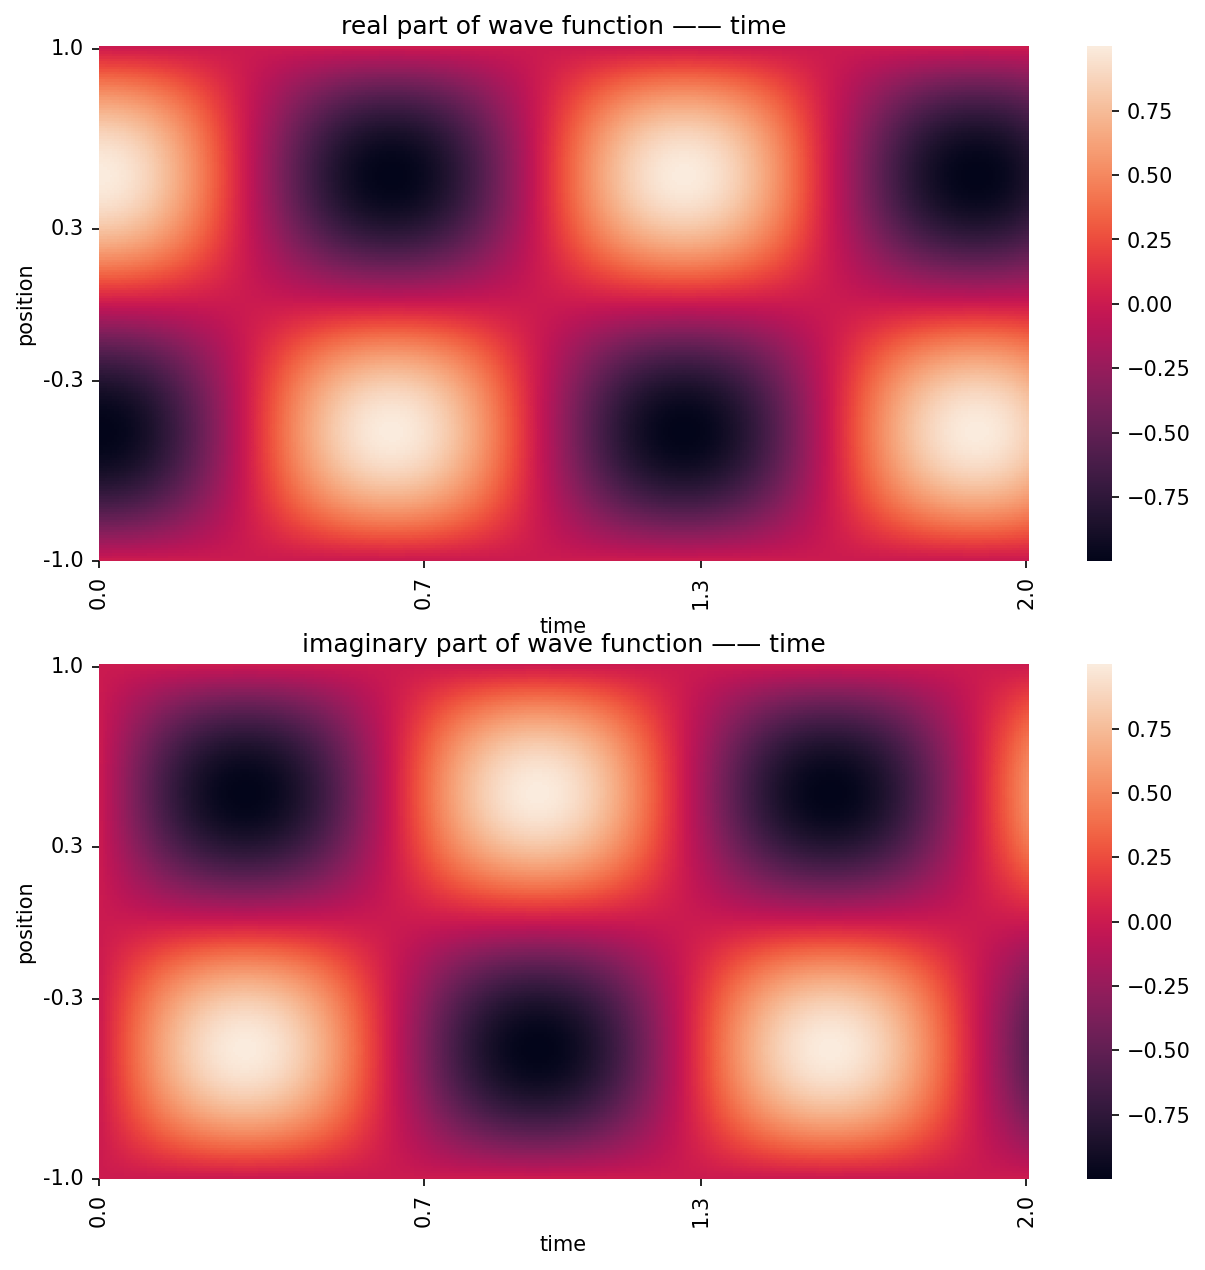

In [11]:
# plot

plt.figure(figsize=(10, 10), dpi=150)

draw_time_list = np.linspace(0, time_n-1, min(400, time_n)).astype(np.int32)
draw_position_list = np.linspace(0, space_n-1, min(400, space_n)).astype(np.int32)
phi_matrix_draw = phi_matrix[draw_position_list, :][:, draw_time_list]

time_list = np.linspace(0, time_total, len(draw_time_list))
position_list = np.linspace(-box_l/2, box_l/2, len(draw_position_list))

position_labels = np.around(np.linspace(-box_l/2, box_l/2, 4), 1)
# the index position of the tick labels
position_ticks = list()
for label in position_labels:
    idx_pos = len(position_list) - np.argmin(np.abs(label-position_list))
    position_ticks.append(idx_pos)

time_labels = np.around(np.linspace(0, time_total, 4), 1)
time_ticks = list()
for label in time_labels:
    idx_pos = np.argmin(np.abs(label-time_list))
    time_ticks.append(idx_pos)

# real
plt.subplot(2, 1, 1)
ax = sns.heatmap(np.real(phi_matrix_draw), annot=False)
ax.set_xlabel("time")
ax.set_ylabel("position")
ax.set_yticks(position_ticks)
ax.set_xticks(time_ticks)
ax.set_title("real part of wave function —— time")
ax.set_xticklabels(time_labels)
ax.set_yticklabels(position_labels)

# imag
plt.subplot(2, 1, 2)
ax_imag = sns.heatmap(np.imag(phi_matrix_draw), annot=False)
ax_imag.set_xlabel("time")
ax_imag.set_ylabel("position")
ax_imag.set_yticks(position_ticks)
ax_imag.set_xticks(time_ticks)
ax_imag.set_title("imaginary part of wave function —— time")
ax_imag.set_xticklabels(time_labels)
ax_imag.set_yticklabels(position_labels)

plt.show()

## PINN
Using PINN to solve the Shrodinger Equation in a infinite potential well

### model

* #### Inputs
position $x_i$, and time $t_i$
* #### output
the wave function value $u$ at $(x_i, t_i)$
* #### Conditions
    * 